In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [97]:
car_data = pd.read_csv("Resource/Crash_information_(Last_5_Years).csv")
car_data.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [98]:
# filter out data not needed
car_df = car_data.drop(columns=["X","Y","OBJECTID","ROAD_NO","ROAD_NAME", "COMMON_ROAD_NAME", "CWAY", "SLK", "INTERSECTION_NO", "INTERSECTION_DESC"])
car_df.head()

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,10231294,115.792274,-32.029452,07/05/2020,1020.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,10231300,115.821106,-31.901343,07/05/2020,1525.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,10231306,115.970937,-32.066115,06/05/2020,1155.0,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,10231312,115.852685,-31.952160,06/05/2020,845.0,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,10231318,115.949014,-31.906427,04/05/2020,700.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [99]:
# different types of crashes
pedest = (car_df["TOTAL_PEDESTRIANS_INVOLVED"]>0).sum()
vehicles = (car_df["TOTAL_OTHER_VEHICLES_INVOLVED"]>0).sum()
motocycles = (car_df["TOTAL_MOTOR_CYCLE_INVOLVED"]>0).sum()
trucks = (car_df["TOTAL_TRUCK_INVOLVED"]>0).sum()
heavy_trucks = (car_df["TOTAL_HEAVY_TRUCK_INVOLVED"]>0).sum()
bikes = (car_df["TOTAL_BIKE_INVOLVED"]>0).sum()
total = len(car_df)

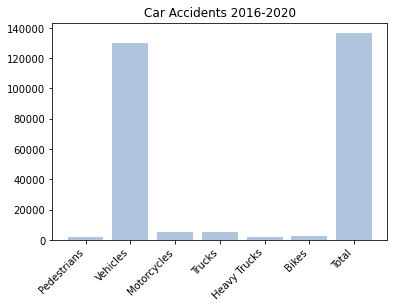

In [100]:
# compare different accident types via graph
types = ["Pedestrians", "Vehicles", "Motorcycles", "Trucks", "Heavy Trucks", "Bikes", "Total"]
crash_types = [pedest, vehicles, motocycles, trucks, heavy_trucks, bikes, total]
x_axis = np.arange(len(crash_types))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, crash_types, color="lightsteelblue")
plt.title("Car Accidents 2016-2020")
plt.xticks(tick_locations, types, rotation=45,horizontalalignment="right")
plt.savefig("Car_accidents_5yrs.png")
plt.show()

In [102]:
# slice the date column to only include year
car_df["CRASH_DATE"] = car_df["CRASH_DATE"].str[-4:]

In [103]:
# add region column to df
car_df["REGION"] = ""

In [104]:
# add metro, northern, southern region to dataframe
car_df["REGION"] = car_df.LATITUDE.apply(lambda x: "Northern" if x>-31.5471024260016 else ("Metro" if x>-32.6343558722623 else "Southern"))
car_df.head()
car_df.to_csv("car_df.csv", index=False)


In [105]:
car_df.head()

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,REGION
0,10231294,115.792274,-32.029452,2020,1020.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0,Metro
1,10231300,115.821106,-31.901343,2020,1525.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0,Metro
2,10231306,115.970937,-32.066115,2020,1155.0,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0,Metro
3,10231312,115.852685,-31.952160,2020,845.0,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0,Metro
4,10231318,115.949014,-31.906427,2020,700.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0,Metro


In [106]:
# filtered for pedestrians 
pedestrian_df = car_df[car_df["TOTAL_PEDESTRIANS_INVOLVED"]>0]
pedestrian_df

# save file
pedestrian_df.to_csv("pedestrian_data.csv", index=False)


In [107]:
# group data by year and region
result = pedestrian_df.groupby(['CRASH_DATE','REGION'])['TOTAL_PEDESTRIANS_INVOLVED'].count()


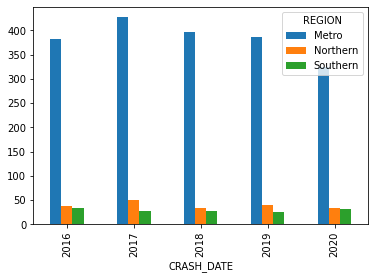

In [108]:
# look at graph representation
result.unstack().plot(kind='bar')

In [109]:
# unstack the results
bar_result = result.unstack()
bar_result.head()

REGION,Metro,Northern,Southern
CRASH_DATE,,,
2016,382,37,33
2017,427,51,28
2018,396,34,28
2019,387,39,26
2020,325,34,32


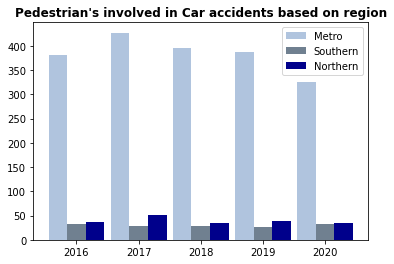

In [110]:
# plot the graph
w = 0.3
x= bar_result.index
Metro=bar_result["Metro"]
Southern=bar_result["Southern"]
Northern=bar_result["Northern"]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.bar(bar1,Metro,w,label="Metro", color="lightsteelblue")
plt.bar(bar2,Southern,w,label="Southern",color="slategray")
plt.bar(bar3,Northern,w,label="Northern", color="darkblue")
plt.xticks(bar1+w,[2016, 2017, 2018, 2019, 2020])
plt.legend(loc='best')
plt.title("Pedestrian's involved in Car accidents based on region", fontweight='bold')
plt.savefig("pedestrian accidents by region.png")
plt.show()